Naive Bayes Classifier Report
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00      4596
     neutral       0.00      0.00      0.00      6990
    positive       0.44      1.00      0.61      9194

    accuracy                           0.44     20780
   macro avg       0.15      0.33      0.20     20780
weighted avg       0.20      0.44      0.27     20780

Confusion Matrix


C:\Users\jaag1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jaag1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jaag1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[[   0    0 4596]
 [   0    0 6990]
 [   0    0 9194]]


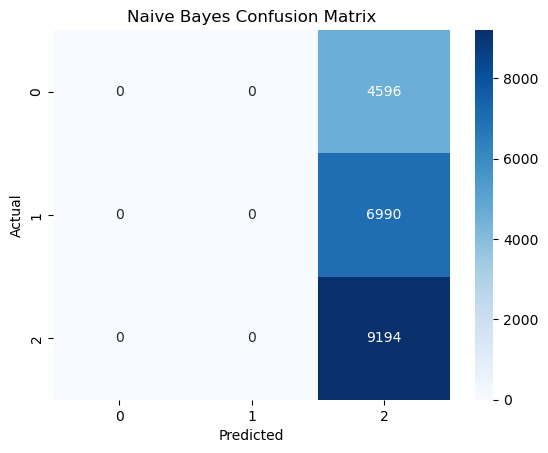

SVM Classifier Report
              precision    recall  f1-score   support

    negative       0.45      0.09      0.14      4596
     neutral       0.54      0.53      0.54      6990
    positive       0.54      0.76      0.63      9194

    accuracy                           0.53     20780
   macro avg       0.51      0.46      0.44     20780
weighted avg       0.52      0.53      0.49     20780

Confusion Matrix
[[ 393 1245 2958]
 [ 187 3722 3081]
 [ 284 1926 6984]]


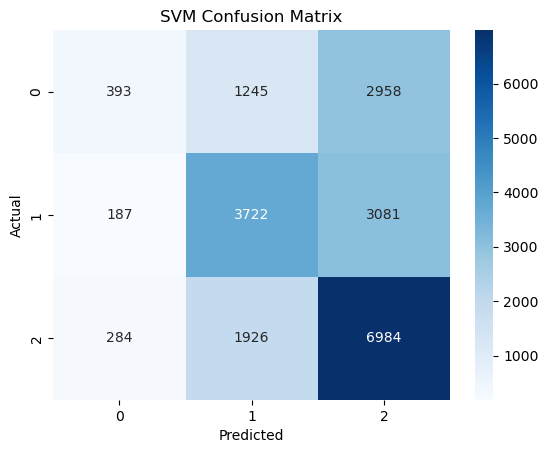

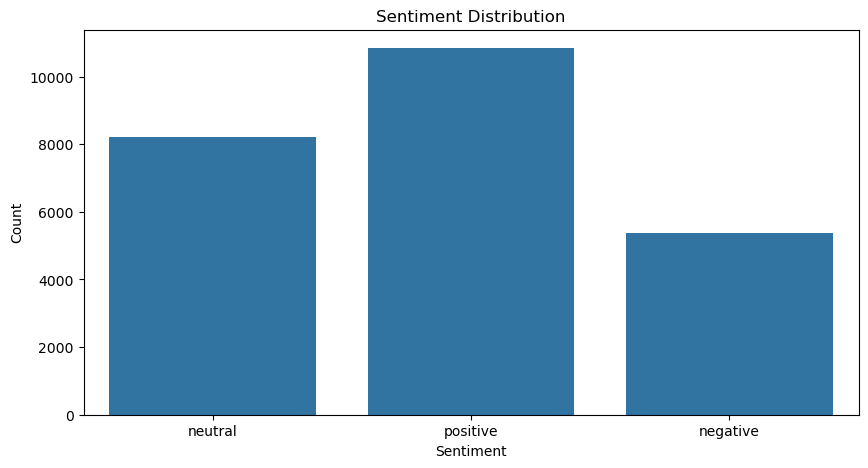

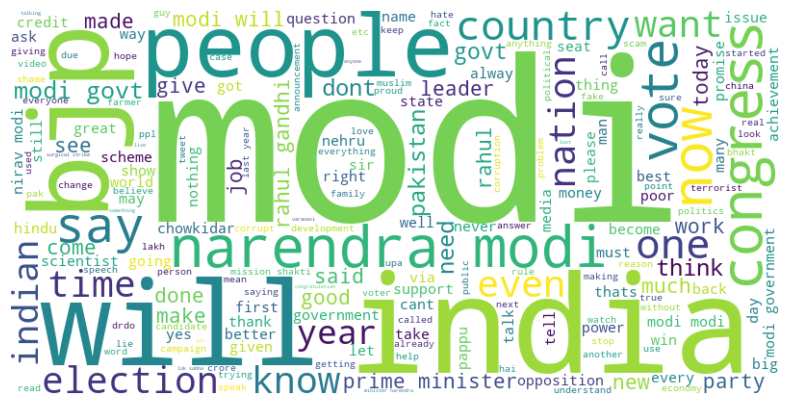

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import IncrementalPCA
from wordcloud import WordCloud
from textblob import TextBlob

# Load your dataset
df = pd.read_csv('C:/Users/jaag1/Downloads/Twitter Data/Twitter dataset.csv')

# Sample a subset of the data to reduce memory usage
df_sampled = df.sample(frac=0.15, random_state=42)  # Adjust frac value as needed (15% for training)

# Clean the text data (NLP preprocessing)
df_sampled['clean_text'] = df_sampled['clean_text'].str.lower().str.replace('[^/w/s]', '')  # Remove punctuation and convert to lowercase

df_sampled['clean_text'] = df_sampled['clean_text'].fillna('')

# Sentiment Analysis
df_sampled['sentiment'] = df_sampled['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_sampled['sentiment_label'] = df_sampled['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_sampled['clean_text'], df_sampled['sentiment_label'], train_size=0.15, test_size=0.85, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Dimensionality Reduction using IncrementalPCA
ipca = IncrementalPCA(n_components=100, batch_size=500)
X_train_ipca = ipca.fit_transform(X_train_tfidf.toarray())
X_test_ipca = ipca.transform(X_test_tfidf.toarray())

# Ensure no negative values in the input data
X_train_ipca = np.maximum(X_train_ipca, 0)
X_test_ipca = np.maximum(X_test_ipca, 0)

# Implement a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_ipca, y_train)

# Predict the test set results
y_pred_nb = nb_classifier.predict(X_test_ipca)

# Evaluate the Naive Bayes classifier
print("Naive Bayes Classifier Report")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_nb))

# Visualize the results
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Implement a Support Vector Machine (SVM) classifier
svm_classifier = SVC()
svm_classifier.fit(X_train_ipca, y_train)

# Predict the test set results
y_pred_svm = svm_classifier.predict(X_test_ipca)

# Evaluate the SVM classifier
print("SVM Classifier Report")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_svm))

# Visualize the SVM results
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualize Sentiment Analysis results
plt.figure(figsize=(10, 5))
sns.countplot(data=df_sampled, x='sentiment_label')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Generate Word Cloud for text data
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_sampled['clean_text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



Naive Bayes Classifier Report


C:\Users\jaag1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jaag1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jaag1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

    negative       0.00      0.00      0.00      1076
     neutral       0.57      1.00      0.73      4084
    positive       0.84      0.30      0.44      3038

    accuracy                           0.61      8198
   macro avg       0.47      0.43      0.39      8198
weighted avg       0.60      0.61      0.53      8198

Confusion Matrix
[[   0  901  175]
 [   0 4079    5]
 [   0 2127  911]]


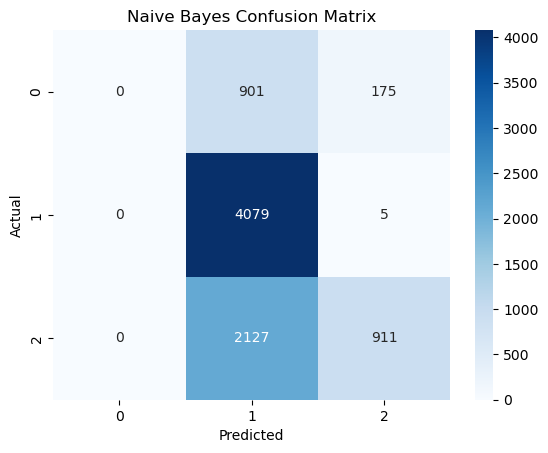

SVM Classifier Report
              precision    recall  f1-score   support

    negative       0.60      0.21      0.31      1076
     neutral       0.92      0.91      0.91      4084
    positive       0.73      0.91      0.81      3038

    accuracy                           0.82      8198
   macro avg       0.75      0.67      0.68      8198
weighted avg       0.81      0.82      0.79      8198

Confusion Matrix
[[ 224  142  710]
 [  58 3701  325]
 [  93  183 2762]]


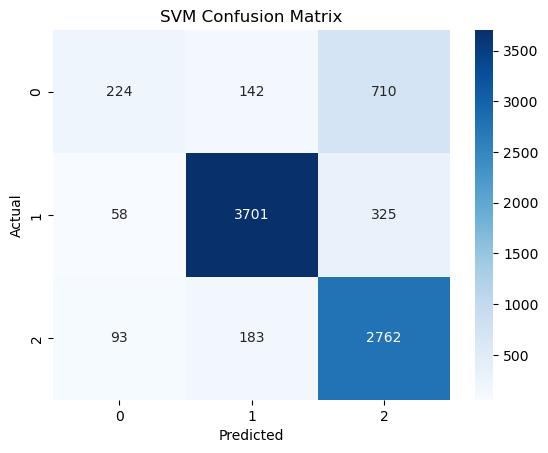

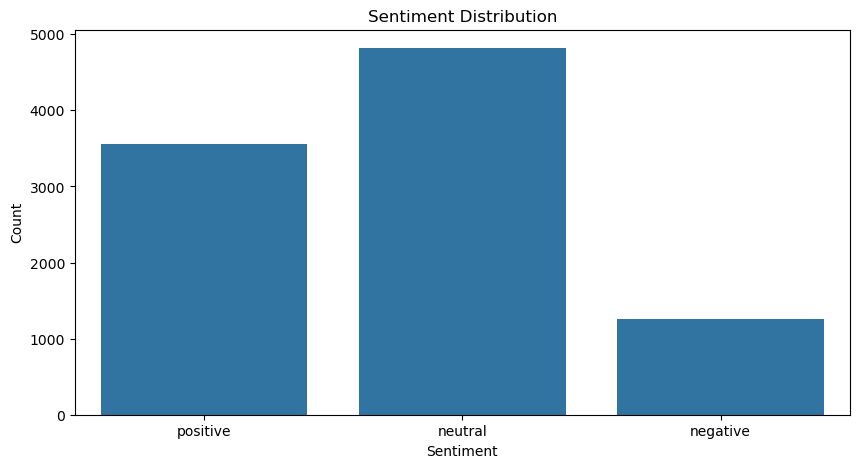

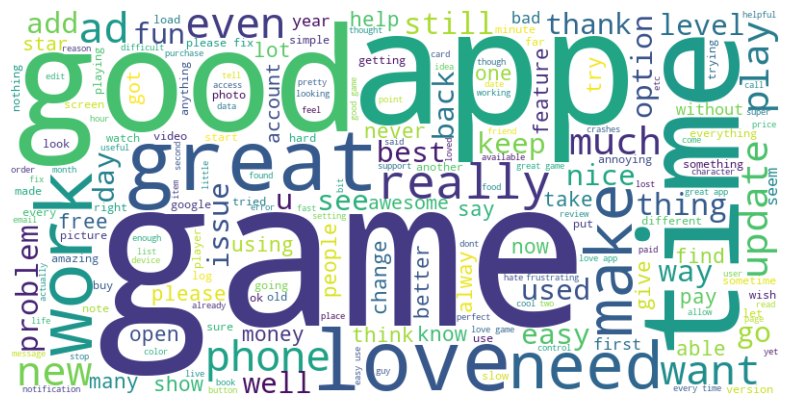

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import IncrementalPCA
from wordcloud import WordCloud
from textblob import TextBlob

# Load your dataset
df1 = pd.read_csv('C:/Users/jaag1/Downloads/play store review/user_reviews.csv')

# Sample a subset of the data to reduce memory usage
df1_sampled = df1.sample(frac=0.15, random_state=42)  # Adjust frac value as needed (15% for training)

# Clean the text data (NLP preprocessing)
df1_sampled['clean_text'] = df1_sampled['Translated_Review'].str.lower().str.replace('[^/w/s]', '')  # Remove punctuation and convert to lowercase
df1_sampled['clean_text'] = df1_sampled['clean_text'].fillna('')

# Sentiment Analysis
df1_sampled['sentiment'] = df1_sampled['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df1_sampled['sentiment_label'] = df1_sampled['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df1_sampled['clean_text'], df1_sampled['sentiment_label'], train_size=0.15, test_size=0.85, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Dimensionality Reduction using IncrementalPCA
ipca = IncrementalPCA(n_components=100, batch_size=500)
X_train_ipca = ipca.fit_transform(X_train_tfidf.toarray())
X_test_ipca = ipca.transform(X_test_tfidf.toarray())

# Ensure no negative values in the input data
X_train_ipca = np.maximum(X_train_ipca, 0)
X_test_ipca = np.maximum(X_test_ipca, 0)

# Implement a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_ipca, y_train)

# Predict the test set results
y_pred_nb = nb_classifier.predict(X_test_ipca)

# Evaluate the Naive Bayes classifier
print("Naive Bayes Classifier Report")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_nb))

# Visualize the results
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Implement a Support Vector Machine (SVM) classifier
svm_classifier = SVC()
svm_classifier.fit(X_train_ipca, y_train)

# Predict the test set results
y_pred_svm = svm_classifier.predict(X_test_ipca)

# Evaluate the SVM classifier
print("SVM Classifier Report")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_svm))

# Visualize the SVM results
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualize Sentiment Analysis results
plt.figure(figsize=(10, 5))
sns.countplot(data=df1_sampled, x='sentiment_label')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Generate Word Cloud for text data
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df1_sampled['clean_text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
